In [1]:
##import packages here
import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
path = '/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge/Data/dt'

In [3]:
df = pd.read_csv(path+'/dff1.csv')
df = df.rename(columns= {'Close': 'y'})
df

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp,diff
0,2009-01-28,874.09,2.71,0.15,1927437.0,18.75,3.23,120.3907,7.8,473.019989,42.04,171.2,336929.0,42.35,775.368737,98.721263
1,2009-01-29,845.14,2.87,0.15,1927437.0,18.75,3.23,120.3907,7.8,453.239990,41.58,171.2,336929.0,43.33,771.778314,73.361686
2,2009-01-30,825.88,2.87,0.15,1927437.0,18.75,3.23,120.3907,7.8,443.529999,41.73,171.2,336929.0,44.96,769.800284,56.079716
3,2009-02-02,825.44,2.76,0.22,1927437.0,15.31,3.24,107.1560,8.3,449.609985,41.35,169.3,335576.0,45.40,774.798116,50.641884
4,2009-02-03,838.51,2.89,0.22,1927437.0,15.31,3.24,107.1560,8.3,452.899994,40.87,169.3,335576.0,43.05,772.782361,65.727639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3176.089345,161.660655
2762,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3177.664932,48.225068
2763,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3179.642531,-51.432531
2764,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3181.017180,-64.627180


In [4]:
df.columns

Index(['ds', 'y', 'tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus',
       'wti', 'ppi', 'rfs', 'vix', 'fbsp', 'diff'],
      dtype='object')

In [5]:
ft_df = df[['y', 'tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus',
       'wti', 'ppi', 'rfs', 'vix']].copy()
# ft_df = df[['diff1','wti']].copy()

In [6]:
ft_df.corr()['y'].sort_values()

une   -0.957674
vix   -0.619459
wti   -0.474071
div   -0.473598
tby   -0.346576
per   -0.274926
ppi    0.374603
eps    0.780400
ffr    0.806978
fta    0.809168
rfs    0.982693
rus    0.985047
y      1.000000
Name: y, dtype: float64

In [7]:
ft_df2 = df[['diff', 'tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus',
       'wti', 'ppi', 'rfs', 'vix']].copy()
ft_df2.corr()['diff'].sort_values()


eps    -0.345821
vix    -0.208423
rfs    -0.179671
ffr    -0.172763
fta    -0.138866
ppi    -0.116836
rus    -0.063608
div     0.145938
une     0.166341
wti     0.167943
tby     0.231229
per     0.278008
diff    1.000000
Name: diff, dtype: float64

In [8]:
ft_df2['eps_tby'] = ft_df2['eps'] * ft_df2['tby']

In [32]:
ft_df2['une_div_vix'] = ft_df2['une'] * ft_df2['div'] * ft_df2['vix']
ft_df2['une_div'] = ft_df2['une'] * ft_df2['div'] 
ft_df2['une_div_tby'] = ft_df2['une'] * ft_df2['div'] * ft_df2['tby']
ft_df2['une_div_tby_per'] = ft_df2['une'] * ft_df2['div'] * ft_df2['tby'] * ft_df2['per']
ft_df2['wti_tby'] = ft_df2['wti']  * ft_df2['tby']

ft_df2['eps_vix'] = ft_df2['eps'] * ft_df2['vix']
ft_df2['eps_ffr'] = ft_df2['eps'] * ft_df2['ffr']
ft_df2['eps_div'] = ft_df2['eps'] * ft_df2['div']




ft_df2['wti_div'] = ft_df2['wti']  * ft_df2['div']

ft_df2['une_tby'] = ft_df2['une']  * ft_df2['tby']
ft_df2['une_div_tby_per_wti'] = ft_df2['une'] * ft_df2['div'] * ft_df2['tby'] * ft_df2['per'] * ft_df2['wti']


In [33]:
ft_df2.corr()['diff'].sort_values()


eps_vix               -0.675169
eps_div               -0.403809
eps                   -0.345821
eps_tby               -0.229669
eps_ffr               -0.219523
vix                   -0.208423
rfs                   -0.179671
ffr                   -0.172763
fta                   -0.138866
ppi                   -0.116836
rus                   -0.063608
une_div_vix            0.071915
div                    0.145938
une                    0.166341
wti                    0.167943
une_div                0.215960
tby                    0.231229
wti_div                0.234092
une_tby                0.234114
wti_tby                0.239971
une_div_tby            0.275420
per                    0.278008
une_div_tby_per        0.287774
une_div_tby_per_wti    0.326614
diff                   1.000000
Name: diff, dtype: float64

In [29]:
ft_df['diff2_sq'] = np.power(abs(ft_df['diff2']),1/1000)

In [30]:
ft_df

,diff2,tby,ffr,fta,eps,div,per,une,rus,ppi,rfs,vix,diff2_sq
0,24.416310,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,154.3,343998.0,148.30,1.003200
1,21.480389,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,154.3,343998.0,149.00,1.003072
2,22.570888,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,154.3,343998.0,148.40,1.003122
3,10.417001,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,154.3,343998.0,150.50,1.002346
4,0.769684,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,154.3,343998.0,152.00,0.999738
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,161.660655,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,196.7,525810.0,17.05,1.005098
3663,48.225068,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,196.7,525810.0,20.15,1.003883
3664,-51.432531,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,196.7,525810.0,21.95,1.003948
3665,-64.627180,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,196.7,525810.0,22.45,1.004177


In [26]:
ft_df.corr()['diff1_sq'].sort_values()

diff1      -0.296830
une        -0.193852
tby        -0.141625
vix        -0.136751
ffr         0.022753
per         0.032558
div         0.059449
fta         0.145162
ppi         0.170473
eps         0.174707
rus         0.219242
rfs         0.283183
diff1_sq    1.000000
Name: diff1_sq, dtype: float64

In [7]:
ft_df2 = df[['y','tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus', 'ppi', 'rfs', 'vix']].copy()
ft_df2.corr()['y'].sort_values()

une   -0.709928
tby   -0.462890
vix   -0.383554
div   -0.343978
per   -0.260242
ffr   -0.016427
ppi    0.475103
fta    0.728777
eps    0.762051
rfs    0.972881
rus    0.985263
y      1.000000
Name: y, dtype: float64

In [27]:
ft_df2 = df[['fbsp1','tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus', 'ppi', 'rfs', 'vix']].copy()
ft_df2.corr()['fbsp1'].sort_values()

une     -0.710692
tby     -0.463996
vix     -0.373196
div     -0.329511
per     -0.254675
ffr     -0.007827
ppi      0.471825
fta      0.723090
eps      0.765407
rfs      0.974001
rus      0.976228
fbsp1    1.000000
Name: fbsp1, dtype: float64

In [14]:
ft_df3 = df.copy()

In [15]:
ft_df3['ratio'] = ft_df3['fbsp1']/ft_df3['y']
ft_df3

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp1,diff1,fbsp2,diff2,ratio
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30,1204.542825,11.557175,1191.683690,24.416310,0.990497
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00,1204.263689,9.346311,1192.129611,21.480389,0.992299
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40,1203.150993,10.729007,1191.309112,22.570888,0.991161
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50,1202.509139,-1.779139,1190.312999,10.417001,1.001482
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00,1201.367987,-9.797987,1190.800316,0.769684,1.008223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3176.089345,161.660655,3176.089345,161.660655,0.951566
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3177.664932,48.225068,3177.664932,48.225068,0.985051
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3179.642531,-51.432531,3179.642531,-51.432531,1.016442
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3181.017180,-64.627180,3181.017180,-64.627180,1.020738


In [16]:
ft_df3 = ft_df3[['ratio','tby', 'ffr', 'fta', 'eps', 'div', 'per', 'une', 'rus', 'ppi', 'rfs', 'vix']].copy()
ft_df3.corr()['ratio'].sort_values()

tby     -0.123320
une     -0.106581
ppi      0.011076
ffr      0.030289
rus      0.039535
vix      0.056194
per      0.057979
fta      0.080445
eps      0.105879
rfs      0.133015
div      0.138206
ratio    1.000000
Name: ratio, dtype: float64

In [12]:
ft_df2 = np.log(ft_df).copy()
ft_df2.corr()['diff1'].sort_values()



tby     -0.317805
div     -0.195854
vix     -0.164825
une     -0.102851
ffr     -0.018370
eps      0.098764
fta      0.288781
diff1    1.000000
Name: diff1, dtype: float64

In [ ]:
# fta, eps, tby, une,  ???? div, vix, ffr 

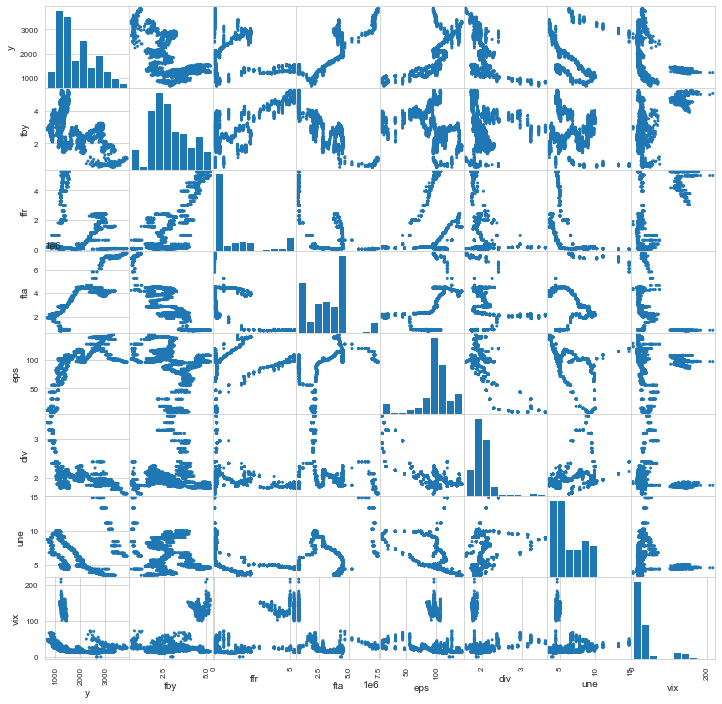

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(ft_df[['y', 'tby', 'ffr', 'fta', 'eps', 'div', 'une', 'vix']], figsize = (12,12), alpha = 1)
plt.show()

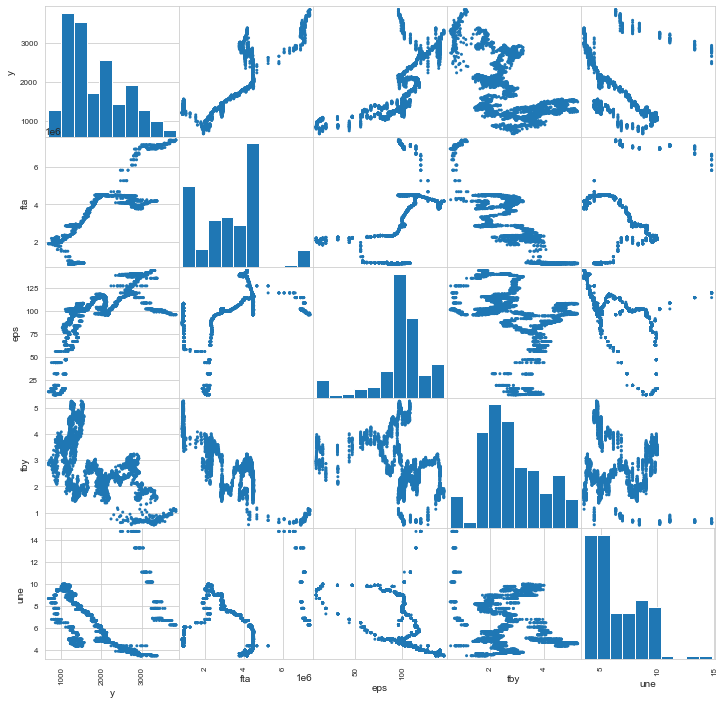

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(ft_df[['y','fta', 'eps', 'tby', 'une']], figsize = (12,12), alpha = 1)
plt.show()

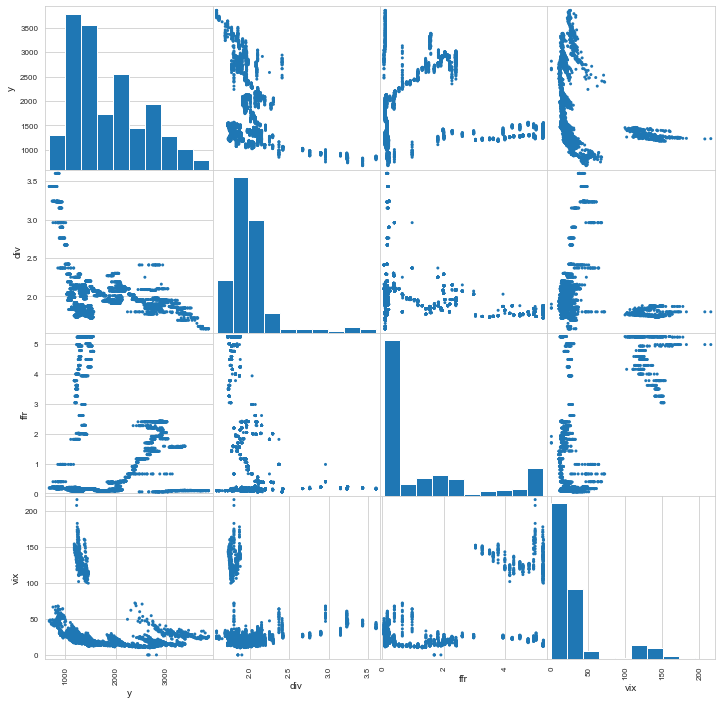

In [6]:
scatter_matrix(ft_df[['y','div', 'ffr' ,'vix']], figsize = (12,12), alpha = 1)
plt.show()

In [9]:
ft_log_df = np.log(ft_df).copy()
ft_log_df

,y,tby,ffr,fta,eps,div,une,vix
0,7.103404,1.413423,1.111858,13.607545,4.440413,0.565314,1.609438,4.999237
1,7.101355,1.401183,1.111858,13.607545,4.440413,0.565314,1.609438,5.003946
2,7.101577,1.373716,1.111858,13.606244,4.440413,0.565314,1.609438,4.999911
3,7.090685,1.376244,1.111858,13.606244,4.440413,0.565314,1.609438,5.013963
4,7.083027,1.366092,1.111858,13.606244,4.440413,0.565314,1.609438,5.023881
...,...,...,...,...,...,...,...,...
3893,8.257220,0.048790,-2.407946,15.819008,4.561427,0.457425,1.840550,3.252311
3894,8.255730,0.048790,-2.407946,15.819008,4.561427,0.457425,1.840550,3.230804
3895,8.229716,0.039221,-2.407946,15.817656,4.561427,0.457425,1.840550,3.498022
3896,8.239430,0.067659,-2.407946,15.817656,4.561427,0.457425,1.840550,3.417399


In [12]:
ft_log_df.corr()['y'].sort_values()

tby   -0.587203
une   -0.526618
vix   -0.455347
div   -0.431928
ffr    0.072031
eps    0.623184
fta    0.679437
y      1.000000
Name: y, dtype: float64

In [ ]:
# ???? div, vix, ffr 

In [19]:
ft_df2 = ft_df.copy()


In [20]:
ft_df2['div_sq'] = ft_df2['div']**2
ft_df2['div_sqrt'] = np.sqrt(ft_df2['div'])
ft_df2['div_inv'] = 1/ ft_df2['div']
ft_df2['div_inv_tri'] =1 / ft_df2['div']**3
ft_df2['div_four'] = ft_df2['div']**4
ft_df2['div_log'] = np.log(ft_df2['div'])
ft_df2['div_exp'] = np.exp(ft_df2['div'])

In [34]:
ft_df2['vix_une'] = ft_df2['vix'] * ft_df2['une']

In [36]:
ft_df2['vix_div'] = ft_df2['vix'] * ft_df2['div']

In [38]:
ft_df2['vix_ffr'] = ft_df2['vix'] * ft_df2['ffr']

In [40]:
ft_df2['div_une'] = ft_df2['div'] * ft_df2['une']

In [42]:
ft_df2['div_une_vix'] = ft_df2['div'] * ft_df2['une'] * ft_df2['vix']

In [44]:
ft_df2['div_une_vix_ffr'] = ft_df2['div'] * ft_df2['une'] * ft_df2['vix'] * ft_df2['ffr']

In [45]:
ft_df2.corr()['y'].sort_values()

tby               -0.581425
div_une_vix       -0.507652
div_une           -0.472108
vix_une           -0.446046
une               -0.417076
vix_div           -0.405701
div_sqrt          -0.371257
div_log           -0.370707
div               -0.370303
div_sq            -0.364117
div_exp           -0.345269
vix               -0.340701
div_four          -0.339561
div_une_vix_ffr   -0.284945
vix_ffr           -0.263629
ffr               -0.102474
div_inv_tri        0.342884
div_inv            0.365361
eps                0.674035
fta                0.802776
y                  1.000000
Name: y, dtype: float64